# Data Analysis on Corona Virus Dataset

An epidemic virus outbreak that deprives health and well-being of populaces in many parts of the world.

All credits deserved to :
    
    https://github.com/CSSEGISandData/COVID-19
    https://github.com/RamiKrispin/coronavirus
    https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv
        

The question on covering the topic would be arranged below:
    Number of cases
    The location which shares the largest number of cases
    Top countries affected
    Distribution Per continent
    Cases Per day
    Cases Per country



<b>Importing modules and loading dataset</b>

In [105]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

# Load GeoPandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes


<b>We look on data published by CSSE</b>

In [27]:
df = pd.read_csv("covid_19_clean_complete.csv")   
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [28]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [29]:
df.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'}, inplace=True)

In [30]:
# Shape of data

df.shape

(5822, 8)

In [31]:
# Info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 8 columns):
Province_State    3075 non-null object
Country_Region    5822 non-null object
Lat               5822 non-null float64
Long              5822 non-null float64
Date              5822 non-null object
Confirmed         5822 non-null int64
Deaths            5822 non-null int64
Recovered         5822 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 364.0+ KB


In [33]:
df.isna().sum()

Province_State    2747
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [34]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,31.898143,28.742503,324.488835,9.252491,80.721058
std,20.352873,87.716531,3719.067891,133.142584,1055.398441
min,-41.454500,-123.869500,0.000000,0.000000,0.000000
25%,26.078900,-51.925300,0.000000,0.000000,0.000000
50%,35.872600,35.431150,1.000000,0.000000,0.000000
75%,43.073100,112.270700,15.000000,0.000000,1.000000
max,64.963100,174.886000,67103.000000,2803.000000,33934.000000


In [41]:
df_sum = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].sum()

In [43]:
df_per_day = df.groupby('Date')['Confirmed','Deaths', 'Recovered'].max()
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [44]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,41.000000,41.000000,41.000000
mean,35928.804878,1244.536585,7765.658537
std,26397.179292,1001.856030,9971.718078
min,444.000000,17.000000,28.000000
25%,7153.000000,249.000000,168.000000
50%,33366.000000,1068.000000,2639.000000
75%,62662.000000,2144.000000,11881.000000
max,67103.000000,2803.000000,33934.000000


In [47]:
# Min and max no of cases
min = df_per_day['Confirmed'].min()
max = df_per_day['Confirmed'].max()

print(f'Minimum number of cases recorded is {min} and the max one is {max}')

Minimum number of cases recorded is 444 and the max one is 67103


In [49]:
# Date of maximum no of cases

df_per_day['Confirmed'].idxmax()

'3/2/20'

In [50]:
# Date of minimum no of cases

df_per_day['Confirmed'].idxmin()

'1/22/20'

In [54]:
# Number of Cases per Country/Province 

df_per_country = df.groupby(['Country_Region'])['Confirmed','Deaths', 'Recovered'].max()
df_per_country

,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,1,0,0
Algeria,3,0,0
Andorra,1,0,0
Armenia,1,0,0
Australia,9,1,4
...,...,...,...
Thailand,43,1,31
UK,40,0,8
US,45,5,2


In [55]:
df_per_country_state = df.groupby(['Province_State','Country_Region'])['Confirmed','Deaths', 'Recovered'].max()
df_per_country_state

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
"Montreal, QC",Canada,1,0,0
Anhui,Mainland China,990,6,917
Beijing,Mainland China,414,8,282
"Boston, MA",US,1,0,1
British Columbia,Canada,8,0,3
...,...,...,...,...
Victoria,Australia,9,0,4
Western Australia,Australia,2,1,0
Xinjiang,Mainland China,76,3,66


In [56]:
df['Country_Region'].value_counts()

Mainland China          1271
US                      1189
Australia                287
Canada                   164
Lithuania                 41
                        ... 
Malaysia                  41
San Marino                41
United Arab Emirates      41
Mexico                    41
Ireland                   41
Name: Country_Region, Length: 75, dtype: int64

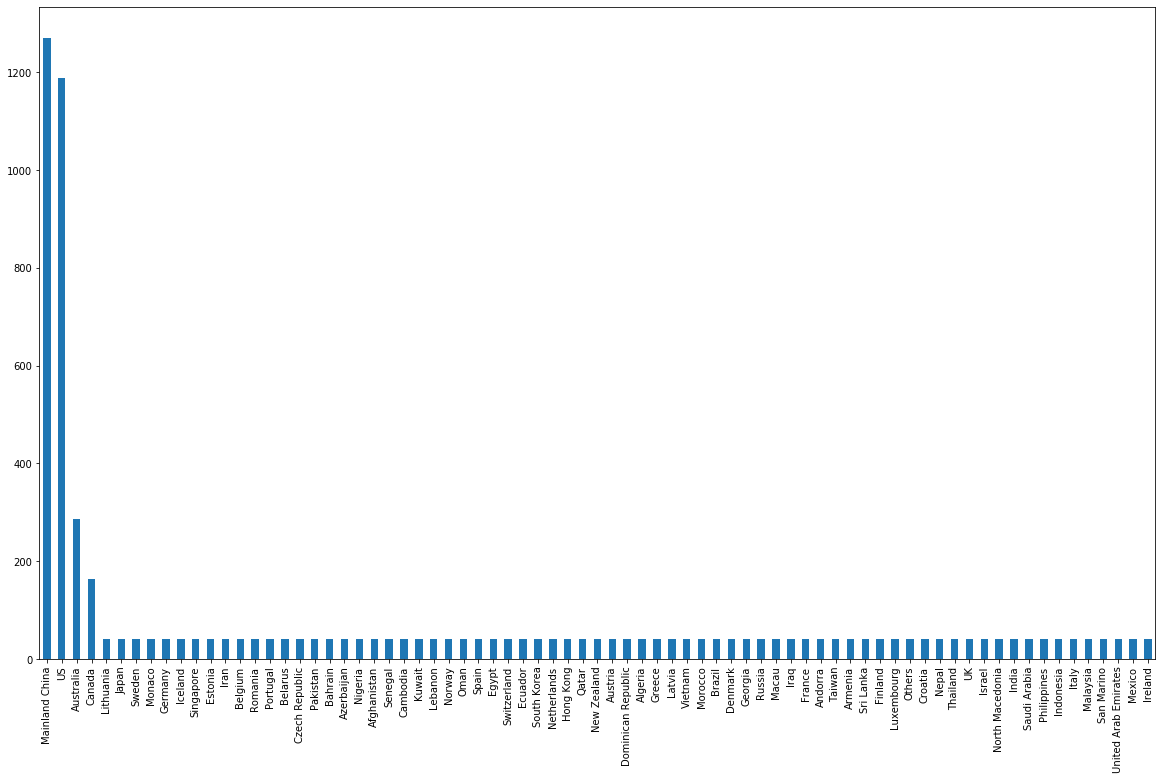

In [57]:
df['Country_Region'].value_counts().plot(kind='bar',figsize=(20,12))


In [58]:
# Which country already affected

df['Country_Region'].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino', 'Belarus',
       'Iceland', 'Lithuania', 'Mexico', 'New Zealand', 'Nigeria',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco',
       'Saudi Arabia', 'Senegal'], dtype=object)

In [59]:
# How many countries?

len(df['Country_Region'].unique())

75

# Map Distribution

In [60]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [61]:
# Convert data into geodataframe

gdf01 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Long'], df['Lat']))

In [62]:
gdf01.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [63]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

In [64]:
# Method 2

points = [ Point(x,y) for x,y in zip(df.Long, df.Lat)]

gdf02 = gpd.GeoDataFrame(df, geometry=points)
gdf02.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


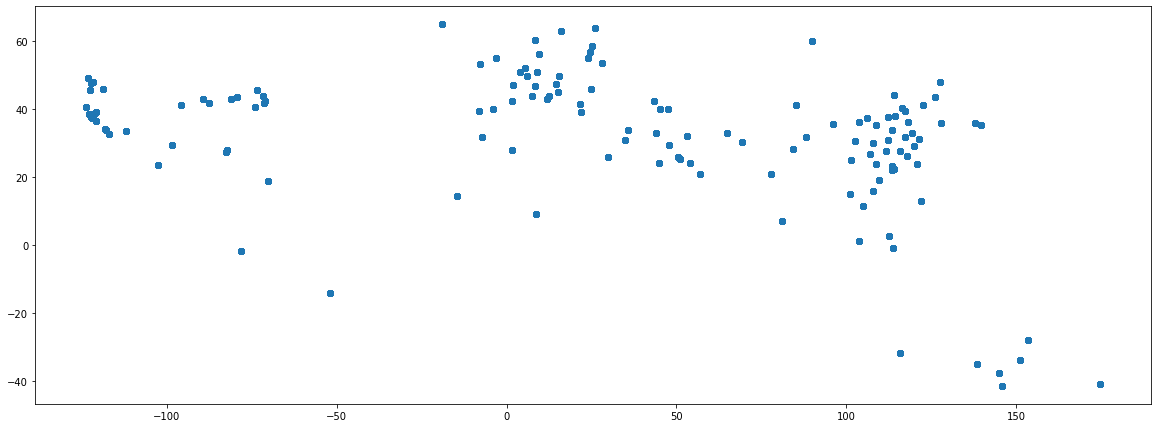

In [65]:
# Map Plotting

gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

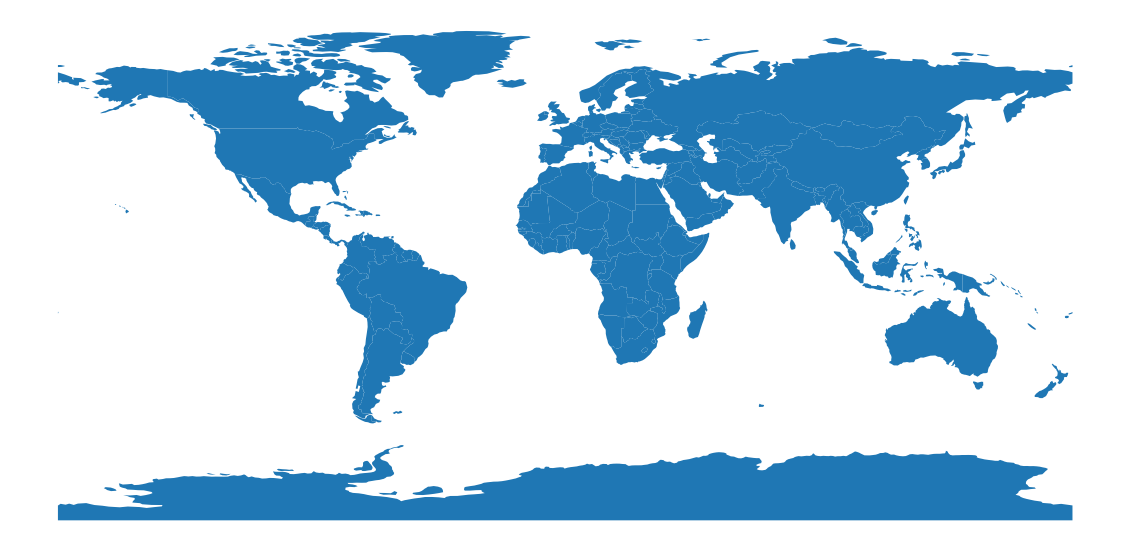

In [68]:
# Overlapping with world map

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

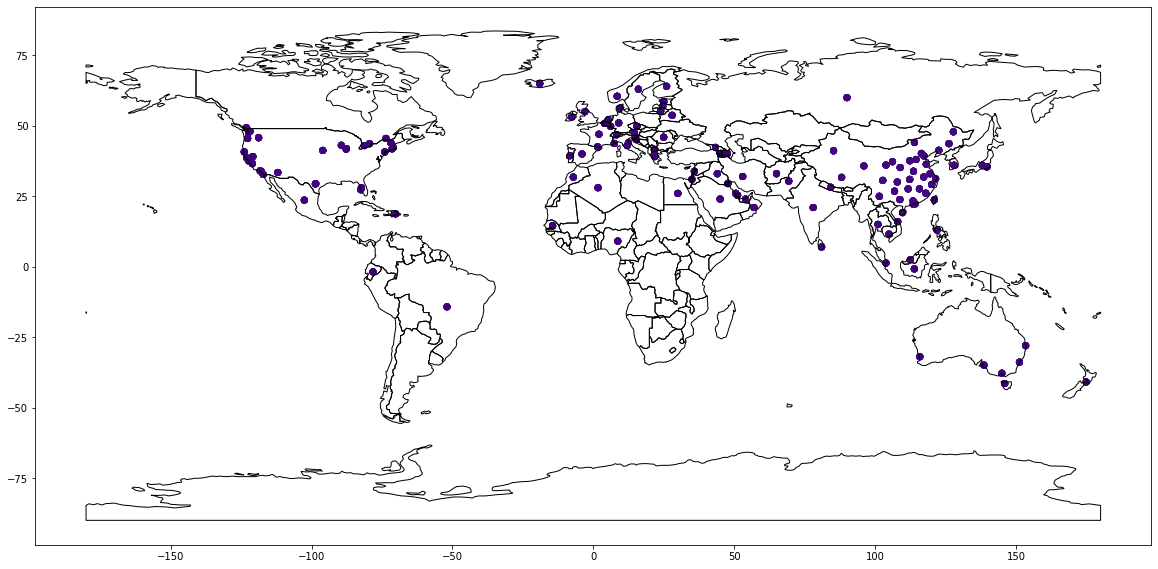

In [69]:
# Overlap

fig, ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None, edgecolor='k', linewidth=None, ax=ax)


In [74]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [77]:
asia = world[world['continent'] == 'Asia']
africa = world[world['continent'] == 'Africa']
europe = world[world['continent'] == 'Europe']
n_america = world[world['continent'] == 'North America']
s_america = world[world['continent'] == 'South America']
oceania = world[world['continent'] == 'Oceania']

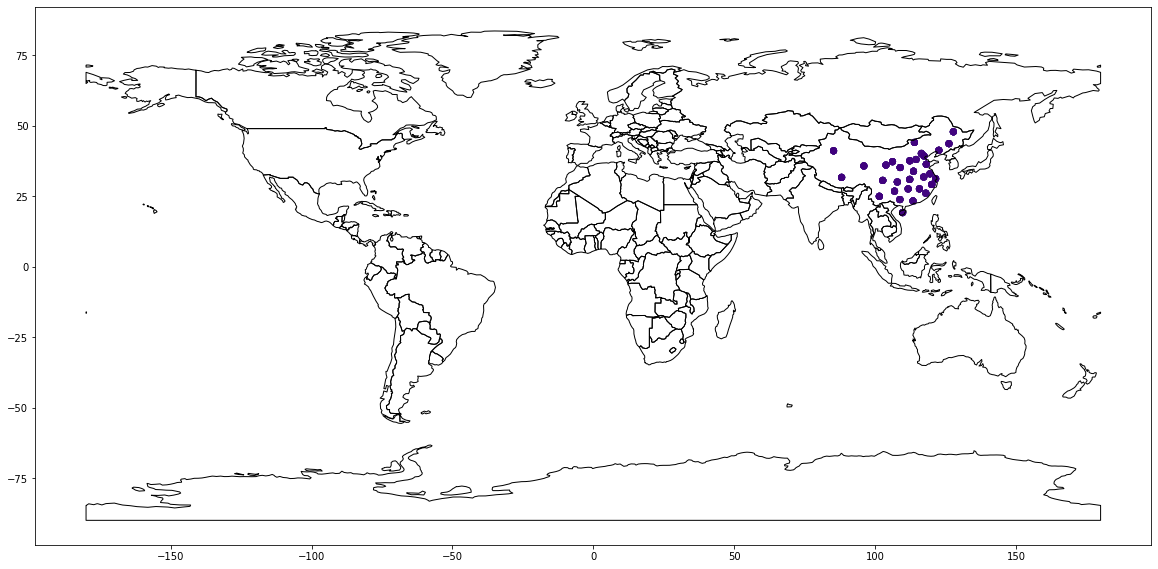

In [80]:
# On China

fig, ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None, edgecolor='k', linewidth=None, ax=ax)

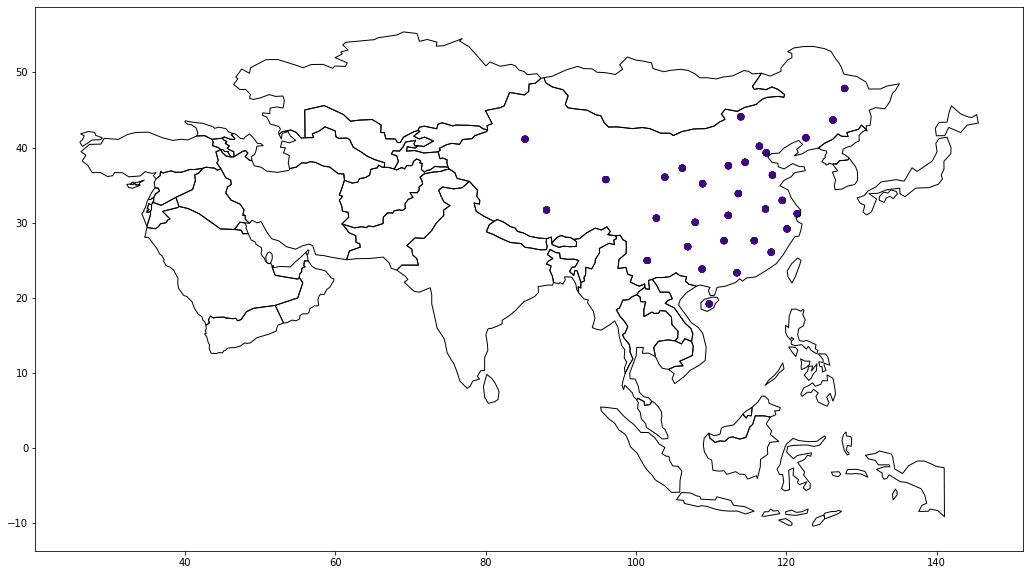

In [82]:
# Mapping on Asia continent

fig, ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None, edgecolor='k', linewidth=None, ax=ax)

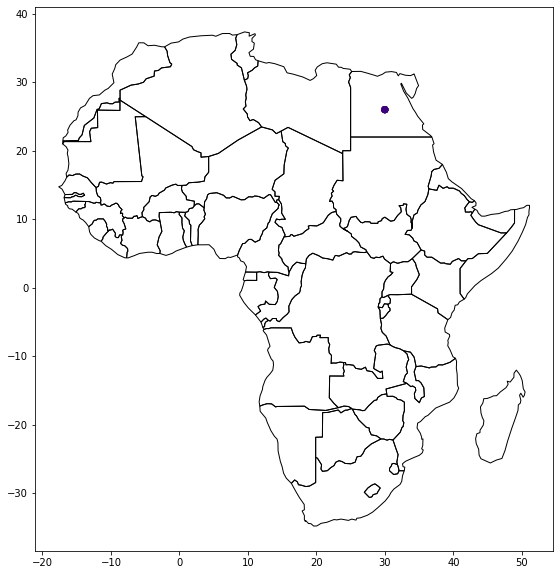

In [83]:
# Mapping on Africa continent, only viewing Egypt

fig, ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country_Region'] == 'Egypt'].plot(cmap='Purples',ax=ax)
africa.geometry.boundary.plot(color=None, edgecolor='k', linewidth=None, ax=ax)

In [85]:
# Time Series Analysis

import datetime as dt

df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [86]:
df2 = df

df2

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
5817,"Placer County, CA",US,39.0916,-120.8039,3/2/20,1,0,0,POINT (-120.80390 39.09160)
5818,"San Mateo, CA",US,37.5630,-122.3255,3/2/20,1,0,0,POINT (-122.32550 37.56300)
5819,"Sarasota, FL",US,27.3364,-82.5307,3/2/20,1,0,0,POINT (-82.53070 27.33640)
5820,"Sonoma County, CA",US,38.5780,-122.9888,3/2/20,1,0,0,POINT (-122.98880 38.57800)


In [87]:
df2['Cases Date'] = pd.to_datetime(df2['Date'])

In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 10 columns):
Province_State    3075 non-null object
Country_Region    5822 non-null object
Lat               5822 non-null float64
Long              5822 non-null float64
Date              5822 non-null object
Confirmed         5822 non-null int64
Deaths            5822 non-null int64
Recovered         5822 non-null int64
geometry          5822 non-null geometry
Cases Date        5822 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int64(3), object(3)
memory usage: 455.0+ KB


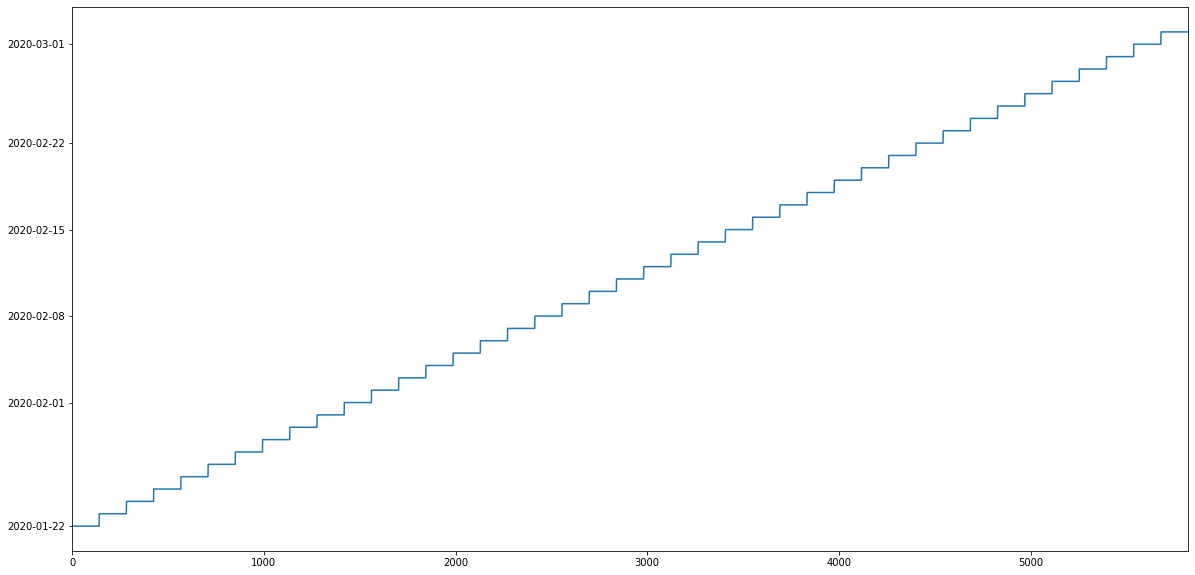

In [91]:
df2['Cases Date'].plot(figsize=(20,10))

In [92]:
ts = df2.set_index('Cases Date')

In [94]:
# Select January Period

ts.loc['2020-01']

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
Cases Date,,,,,,,,,
2020-01-22,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...
2020-01-31,"Placer County, CA",US,39.0916,-120.8039,1/31/20,0,0,0,POINT (-120.80390 39.09160)
2020-01-31,"San Mateo, CA",US,37.5630,-122.3255,1/31/20,0,0,0,POINT (-122.32550 37.56300)
2020-01-31,"Sarasota, FL",US,27.3364,-82.5307,1/31/20,0,0,0,POINT (-82.53070 27.33640)


In [98]:
# Slicing columns, leaving Confirmed, Deaths and Recovered data intact

ts.loc['2020-02-20':'2020-02-23'][['Confirmed','Deaths','Recovered']]

,Confirmed,Deaths,Recovered
Cases Date,,,
2020-02-20,987,6,474
2020-02-20,395,4,153
2020-02-20,567,6,299
2020-02-20,293,1,126
2020-02-20,91,2,71
...,...,...,...
2020-02-23,0,0,0
2020-02-23,0,0,0
2020-02-23,0,0,0


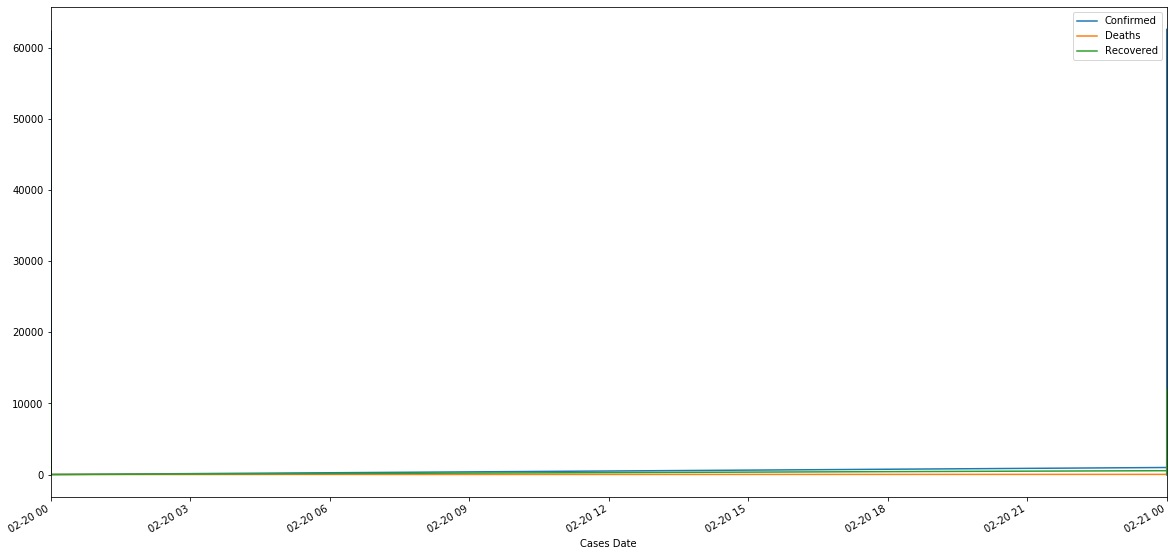

In [101]:
ts.loc['2020-02-20':'2020-02-21'][['Confirmed','Deaths','Recovered']].plot(figsize=(20,10))

In [102]:
df_by_date = ts.groupby(['Cases Date']).sum().reset_index(drop=None)

df_by_date

,Cases Date,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,4529.53632,4081.4354,555,17,28
1,2020-01-23,4529.53632,4081.4354,653,18,30
2,2020-01-24,4529.53632,4081.4354,941,26,36
3,2020-01-25,4529.53632,4081.4354,1434,42,39
4,2020-01-26,4529.53632,4081.4354,2118,56,52
5,2020-01-27,4529.53632,4081.4354,2927,82,61
6,2020-01-28,4529.53632,4081.4354,5578,131,107
7,2020-01-29,4529.53632,4081.4354,6166,133,126
8,2020-01-30,4529.53632,4081.4354,8234,171,143
9,2020-01-31,4529.53632,4081.4354,9927,213,222


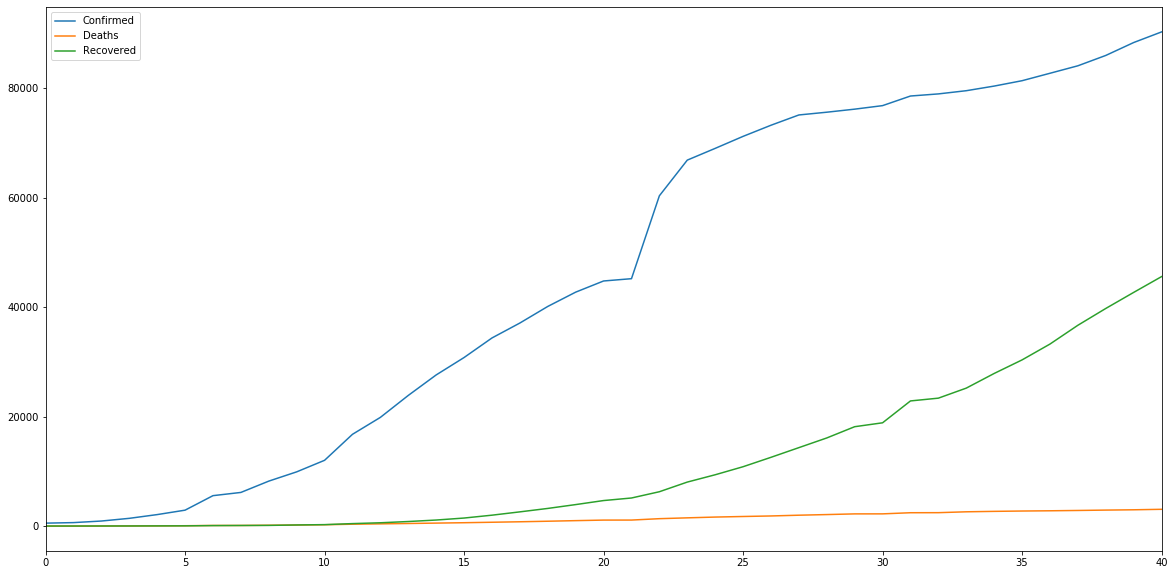

In [104]:
df_by_date[['Confirmed','Deaths','Recovered']].plot(figsize=(20,10))